In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras_tuner import RandomSearch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
import keras_tuner as kt
from sklearn.model_selection import KFold

2023-09-12 14:15:25.667164: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
X = pd.read_csv("X_train42.csv")
y = pd.read_csv("y_train42.csv")
X_test = pd.read_csv("X_test42.csv")
y_test = pd.read_csv("y_test42.csv")
# X = X.drop(['Lon','Lat'],axis=1)
# X_test = X_test.drop(['Lon','Lat'],axis=1)

In [3]:
y.head()

,pCO2
0,383.128962
1,341.439973
2,376.882785
3,329.307006
4,341.602966


In [4]:
sc = StandardScaler()
X = sc.fit_transform(X)
X_test = sc.transform(X_test)

In [5]:
kfold = KFold(n_splits=10)


In [6]:
a = [24,64,44,80,24,22,30,42,78,34,72,38,72,50,62,46,26]

In [7]:
for train_ix,val_ix in kfold.split(X):
    X_train, X_val = X[train_ix], X[val_ix]
    y_train, y_val = y.iloc[train_ix], y.iloc[val_ix]
    ann = Sequential()
    ann.add(Dense(units=32,activation='relu',kernel_initializer='he_normal',input_dim=5))
    for i in range(len(a)):
        ann.add(Dense(units=a[i],activation='relu',kernel_initializer='he_normal'))
    ann.add(Dense(units=1,activation='linear'))
    ann.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001),loss='mean_absolute_error',metrics=keras.metrics.mean_absolute_error)
    
    model = ann.fit(X_train,y_train,epochs=100,validation_data=(X_val,y_val),batch_size=32,verbose=1,use_multiprocessing=True)

2023-09-12 14:15:28.168750: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-12 14:15:28.170267: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Epoch 1/100
804/804 [==============================] - 8s 6ms/step - loss: 115.1868 - mean_absolute_error: 115.1868 - val_loss: 32.3818 - val_mean_absolute_error: 32.3818
Epoch 2/100
804/804 [==============================] - 5s 6ms/step - loss: 20.4792 - mean_absolute_error: 20.4792 - val_loss: 14.6624 - val_mean_absolute_error: 14.6624
Epoch 3/100
804/804 [==============================] - 5s 6ms/step - loss: 12.5627 - mean_absolute_error: 12.5627 - val_loss: 11.1431 - val_mean_absolute_error: 11.1431
Epoch 4/100
804/804 [==============================] - 4s 5ms/step - loss: 9.8744 - mean_absolute_error: 9.8744 - val_loss: 9.1379 - val_mean_absolute_error: 9.1379
Epoch 5/100
804/804 [==============================] - 4s 5ms/step - loss: 8.1118 - mean_absolute_error: 8.1118 - val_loss: 7.5502 - val_mean_absolute_error: 7.5502
Epoch 6/100
804/804 [==============================] - 4s 5ms/step - loss: 7.1042 - mean_absolute_error: 7.1042 - val_loss: 7.1118 - val_mean_absolute_error: 7.1

804/804 [==============================] - 4s 5ms/step - loss: 3.0991 - mean_absolute_error: 3.0991 - val_loss: 3.9505 - val_mean_absolute_error: 3.9505
Epoch 51/100
804/804 [==============================] - 4s 6ms/step - loss: 3.0230 - mean_absolute_error: 3.0230 - val_loss: 3.7653 - val_mean_absolute_error: 3.7653
Epoch 52/100
804/804 [==============================] - 4s 5ms/step - loss: 3.1268 - mean_absolute_error: 3.1268 - val_loss: 2.9849 - val_mean_absolute_error: 2.9849
Epoch 53/100
804/804 [==============================] - 4s 5ms/step - loss: 3.0652 - mean_absolute_error: 3.0652 - val_loss: 3.5367 - val_mean_absolute_error: 3.5367
Epoch 54/100
804/804 [==============================] - 4s 5ms/step - loss: 3.0623 - mean_absolute_error: 3.0623 - val_loss: 3.0611 - val_mean_absolute_error: 3.0611
Epoch 55/100
804/804 [==============================] - 4s 5ms/step - loss: 3.1409 - mean_absolute_error: 3.1409 - val_loss: 3.1258 - val_mean_absolute_error: 3.1258
Epoch 56/100
804/

804/804 [==============================] - 4s 5ms/step - loss: 2.7379 - mean_absolute_error: 2.7379 - val_loss: 3.0929 - val_mean_absolute_error: 3.0929
Epoch 100/100
804/804 [==============================] - 4s 5ms/step - loss: 2.7328 - mean_absolute_error: 2.7328 - val_loss: 2.6848 - val_mean_absolute_error: 2.6848
Epoch 1/100
804/804 [==============================] - 7s 5ms/step - loss: 74.7943 - mean_absolute_error: 74.7943 - val_loss: 24.7503 - val_mean_absolute_error: 24.7503
Epoch 2/100
804/804 [==============================] - 4s 5ms/step - loss: 19.8531 - mean_absolute_error: 19.8531 - val_loss: 21.5066 - val_mean_absolute_error: 21.5066
Epoch 3/100
804/804 [==============================] - 4s 5ms/step - loss: 14.4168 - mean_absolute_error: 14.4168 - val_loss: 13.2105 - val_mean_absolute_error: 13.2105
Epoch 4/100
804/804 [==============================] - 4s 5ms/step - loss: 11.0782 - mean_absolute_error: 11.0782 - val_loss: 9.9892 - val_mean_absolute_error: 9.9892
Epoch 

804/804 [==============================] - 4s 5ms/step - loss: 3.0438 - mean_absolute_error: 3.0438 - val_loss: 2.7632 - val_mean_absolute_error: 2.7632
Epoch 49/100
804/804 [==============================] - 5s 6ms/step - loss: 3.0336 - mean_absolute_error: 3.0336 - val_loss: 4.8691 - val_mean_absolute_error: 4.8691
Epoch 50/100
804/804 [==============================] - 4s 5ms/step - loss: 2.9972 - mean_absolute_error: 2.9972 - val_loss: 2.8919 - val_mean_absolute_error: 2.8919
Epoch 51/100
804/804 [==============================] - 4s 4ms/step - loss: 3.0821 - mean_absolute_error: 3.0821 - val_loss: 3.0839 - val_mean_absolute_error: 3.0839
Epoch 52/100
804/804 [==============================] - 3s 4ms/step - loss: 3.0179 - mean_absolute_error: 3.0179 - val_loss: 2.7091 - val_mean_absolute_error: 2.7091
Epoch 53/100
804/804 [==============================] - 4s 4ms/step - loss: 2.9923 - mean_absolute_error: 2.9923 - val_loss: 3.6742 - val_mean_absolute_error: 3.6742
Epoch 54/100
804/

804/804 [==============================] - 4s 6ms/step - loss: 2.6057 - mean_absolute_error: 2.6057 - val_loss: 2.8682 - val_mean_absolute_error: 2.8682
Epoch 98/100
804/804 [==============================] - 5s 6ms/step - loss: 2.6304 - mean_absolute_error: 2.6304 - val_loss: 2.9932 - val_mean_absolute_error: 2.9932
Epoch 99/100
804/804 [==============================] - 5s 6ms/step - loss: 2.5721 - mean_absolute_error: 2.5721 - val_loss: 2.8087 - val_mean_absolute_error: 2.8087
Epoch 100/100
804/804 [==============================] - 4s 6ms/step - loss: 2.6301 - mean_absolute_error: 2.6301 - val_loss: 2.5963 - val_mean_absolute_error: 2.5963
Epoch 1/100
804/804 [==============================] - 7s 6ms/step - loss: 95.0068 - mean_absolute_error: 95.0068 - val_loss: 22.6418 - val_mean_absolute_error: 22.6418
Epoch 2/100
804/804 [==============================] - 5s 6ms/step - loss: 17.1628 - mean_absolute_error: 17.1628 - val_loss: 13.2653 - val_mean_absolute_error: 13.2653
Epoch 3/10

804/804 [==============================] - 4s 5ms/step - loss: 2.8472 - mean_absolute_error: 2.8472 - val_loss: 2.7543 - val_mean_absolute_error: 2.7543
Epoch 47/100
804/804 [==============================] - 5s 6ms/step - loss: 2.8502 - mean_absolute_error: 2.8502 - val_loss: 2.7401 - val_mean_absolute_error: 2.7401
Epoch 48/100
804/804 [==============================] - 4s 6ms/step - loss: 2.7935 - mean_absolute_error: 2.7935 - val_loss: 2.9587 - val_mean_absolute_error: 2.9587
Epoch 49/100
804/804 [==============================] - 4s 5ms/step - loss: 2.7711 - mean_absolute_error: 2.7711 - val_loss: 3.1956 - val_mean_absolute_error: 3.1956
Epoch 50/100
804/804 [==============================] - 4s 5ms/step - loss: 2.7982 - mean_absolute_error: 2.7982 - val_loss: 2.6662 - val_mean_absolute_error: 2.6662
Epoch 51/100
804/804 [==============================] - 5s 6ms/step - loss: 2.7243 - mean_absolute_error: 2.7243 - val_loss: 4.3458 - val_mean_absolute_error: 4.3458
Epoch 52/100
804/

804/804 [==============================] - 5s 6ms/step - loss: 2.4184 - mean_absolute_error: 2.4184 - val_loss: 2.3525 - val_mean_absolute_error: 2.3525
Epoch 96/100
804/804 [==============================] - 6s 7ms/step - loss: 2.3971 - mean_absolute_error: 2.3971 - val_loss: 2.4713 - val_mean_absolute_error: 2.4713
Epoch 97/100
804/804 [==============================] - 4s 4ms/step - loss: 2.4116 - mean_absolute_error: 2.4116 - val_loss: 2.6209 - val_mean_absolute_error: 2.6209
Epoch 98/100
804/804 [==============================] - 6s 8ms/step - loss: 2.4853 - mean_absolute_error: 2.4853 - val_loss: 2.6847 - val_mean_absolute_error: 2.6847
Epoch 99/100
804/804 [==============================] - 5s 7ms/step - loss: 2.3995 - mean_absolute_error: 2.3995 - val_loss: 2.4598 - val_mean_absolute_error: 2.4598
Epoch 100/100
804/804 [==============================] - 5s 6ms/step - loss: 2.3867 - mean_absolute_error: 2.3867 - val_loss: 2.6464 - val_mean_absolute_error: 2.6464
Epoch 1/100
804/

804/804 [==============================] - 4s 5ms/step - loss: 3.0566 - mean_absolute_error: 3.0566 - val_loss: 3.1497 - val_mean_absolute_error: 3.1497
Epoch 45/100
804/804 [==============================] - 5s 6ms/step - loss: 2.9938 - mean_absolute_error: 2.9938 - val_loss: 3.6788 - val_mean_absolute_error: 3.6788
Epoch 46/100
804/804 [==============================] - 4s 5ms/step - loss: 3.0521 - mean_absolute_error: 3.0521 - val_loss: 3.1035 - val_mean_absolute_error: 3.1035
Epoch 47/100
804/804 [==============================] - 4s 5ms/step - loss: 3.0447 - mean_absolute_error: 3.0447 - val_loss: 3.7171 - val_mean_absolute_error: 3.7171
Epoch 48/100
804/804 [==============================] - 4s 5ms/step - loss: 2.9619 - mean_absolute_error: 2.9619 - val_loss: 3.4777 - val_mean_absolute_error: 3.4777
Epoch 49/100
804/804 [==============================] - 4s 6ms/step - loss: 2.9930 - mean_absolute_error: 2.9930 - val_loss: 3.1806 - val_mean_absolute_error: 3.1806
Epoch 50/100
804/

804/804 [==============================] - 3s 4ms/step - loss: 2.5686 - mean_absolute_error: 2.5686 - val_loss: 3.2273 - val_mean_absolute_error: 3.2273
Epoch 94/100
804/804 [==============================] - 4s 4ms/step - loss: 2.6071 - mean_absolute_error: 2.6071 - val_loss: 2.7649 - val_mean_absolute_error: 2.7649
Epoch 95/100
804/804 [==============================] - 3s 4ms/step - loss: 2.5643 - mean_absolute_error: 2.5643 - val_loss: 2.6450 - val_mean_absolute_error: 2.6450
Epoch 96/100
804/804 [==============================] - 4s 4ms/step - loss: 2.5541 - mean_absolute_error: 2.5541 - val_loss: 2.5663 - val_mean_absolute_error: 2.5663
Epoch 97/100
804/804 [==============================] - 3s 4ms/step - loss: 2.4911 - mean_absolute_error: 2.4911 - val_loss: 2.7764 - val_mean_absolute_error: 2.7764
Epoch 98/100
804/804 [==============================] - 3s 4ms/step - loss: 2.5323 - mean_absolute_error: 2.5323 - val_loss: 3.4714 - val_mean_absolute_error: 3.4714
Epoch 99/100
804/

804/804 [==============================] - 4s 5ms/step - loss: 3.0520 - mean_absolute_error: 3.0520 - val_loss: 3.4570 - val_mean_absolute_error: 3.4570
Epoch 43/100
804/804 [==============================] - 4s 5ms/step - loss: 3.0581 - mean_absolute_error: 3.0581 - val_loss: 2.8265 - val_mean_absolute_error: 2.8265
Epoch 44/100
804/804 [==============================] - 4s 5ms/step - loss: 2.9575 - mean_absolute_error: 2.9575 - val_loss: 3.0463 - val_mean_absolute_error: 3.0463
Epoch 45/100
804/804 [==============================] - 4s 5ms/step - loss: 2.8943 - mean_absolute_error: 2.8943 - val_loss: 3.0454 - val_mean_absolute_error: 3.0454
Epoch 46/100
804/804 [==============================] - 4s 5ms/step - loss: 2.9154 - mean_absolute_error: 2.9154 - val_loss: 2.8599 - val_mean_absolute_error: 2.8599
Epoch 47/100
804/804 [==============================] - 4s 5ms/step - loss: 2.9441 - mean_absolute_error: 2.9441 - val_loss: 3.2431 - val_mean_absolute_error: 3.2431
Epoch 48/100
804/

804/804 [==============================] - 4s 5ms/step - loss: 2.5964 - mean_absolute_error: 2.5964 - val_loss: 2.9765 - val_mean_absolute_error: 2.9765
Epoch 92/100
804/804 [==============================] - 4s 5ms/step - loss: 2.5062 - mean_absolute_error: 2.5062 - val_loss: 2.5951 - val_mean_absolute_error: 2.5951
Epoch 93/100
804/804 [==============================] - 4s 5ms/step - loss: 2.5722 - mean_absolute_error: 2.5722 - val_loss: 2.6227 - val_mean_absolute_error: 2.6227
Epoch 94/100
804/804 [==============================] - 4s 5ms/step - loss: 2.5629 - mean_absolute_error: 2.5629 - val_loss: 3.0574 - val_mean_absolute_error: 3.0574
Epoch 95/100
804/804 [==============================] - 4s 5ms/step - loss: 2.4524 - mean_absolute_error: 2.4524 - val_loss: 3.0264 - val_mean_absolute_error: 3.0264
Epoch 96/100
804/804 [==============================] - 4s 5ms/step - loss: 2.5575 - mean_absolute_error: 2.5575 - val_loss: 2.7698 - val_mean_absolute_error: 2.7698
Epoch 97/100
804/

804/804 [==============================] - 5s 6ms/step - loss: 2.8679 - mean_absolute_error: 2.8679 - val_loss: 3.2121 - val_mean_absolute_error: 3.2121
Epoch 41/100
804/804 [==============================] - 6s 7ms/step - loss: 2.7933 - mean_absolute_error: 2.7933 - val_loss: 2.6042 - val_mean_absolute_error: 2.6042
Epoch 42/100
804/804 [==============================] - 4s 5ms/step - loss: 2.9990 - mean_absolute_error: 2.9990 - val_loss: 3.4356 - val_mean_absolute_error: 3.4356
Epoch 43/100
804/804 [==============================] - 4s 5ms/step - loss: 2.8489 - mean_absolute_error: 2.8489 - val_loss: 2.5681 - val_mean_absolute_error: 2.5681
Epoch 44/100
804/804 [==============================] - 4s 5ms/step - loss: 2.8288 - mean_absolute_error: 2.8288 - val_loss: 2.5719 - val_mean_absolute_error: 2.5719
Epoch 45/100
804/804 [==============================] - 4s 5ms/step - loss: 2.7268 - mean_absolute_error: 2.7268 - val_loss: 2.6915 - val_mean_absolute_error: 2.6915
Epoch 46/100
804/

804/804 [==============================] - 6s 7ms/step - loss: 2.5018 - mean_absolute_error: 2.5018 - val_loss: 2.3703 - val_mean_absolute_error: 2.3703
Epoch 90/100
804/804 [==============================] - 5s 6ms/step - loss: 2.4394 - mean_absolute_error: 2.4394 - val_loss: 2.2208 - val_mean_absolute_error: 2.2208
Epoch 91/100
804/804 [==============================] - 6s 8ms/step - loss: 2.4501 - mean_absolute_error: 2.4501 - val_loss: 2.2327 - val_mean_absolute_error: 2.2327
Epoch 92/100
804/804 [==============================] - 5s 6ms/step - loss: 2.3631 - mean_absolute_error: 2.3631 - val_loss: 2.6989 - val_mean_absolute_error: 2.6989
Epoch 93/100
804/804 [==============================] - 5s 7ms/step - loss: 2.4224 - mean_absolute_error: 2.4224 - val_loss: 2.1909 - val_mean_absolute_error: 2.1909
Epoch 94/100
804/804 [==============================] - 4s 6ms/step - loss: 2.4089 - mean_absolute_error: 2.4089 - val_loss: 2.2894 - val_mean_absolute_error: 2.2894
Epoch 95/100
804/

804/804 [==============================] - 4s 5ms/step - loss: 3.0533 - mean_absolute_error: 3.0533 - val_loss: 2.9787 - val_mean_absolute_error: 2.9787
Epoch 39/100
804/804 [==============================] - 4s 5ms/step - loss: 3.0454 - mean_absolute_error: 3.0454 - val_loss: 3.0043 - val_mean_absolute_error: 3.0043
Epoch 40/100
804/804 [==============================] - 5s 6ms/step - loss: 3.0578 - mean_absolute_error: 3.0578 - val_loss: 3.0023 - val_mean_absolute_error: 3.0023
Epoch 41/100
804/804 [==============================] - 4s 5ms/step - loss: 3.0387 - mean_absolute_error: 3.0387 - val_loss: 3.1952 - val_mean_absolute_error: 3.1952
Epoch 42/100
804/804 [==============================] - 4s 5ms/step - loss: 2.9908 - mean_absolute_error: 2.9908 - val_loss: 2.8717 - val_mean_absolute_error: 2.8717
Epoch 43/100
804/804 [==============================] - 4s 5ms/step - loss: 2.9659 - mean_absolute_error: 2.9659 - val_loss: 3.3148 - val_mean_absolute_error: 3.3148
Epoch 44/100
804/

804/804 [==============================] - 8s 10ms/step - loss: 2.5276 - mean_absolute_error: 2.5276 - val_loss: 2.8828 - val_mean_absolute_error: 2.8828
Epoch 88/100
804/804 [==============================] - 5s 7ms/step - loss: 2.5748 - mean_absolute_error: 2.5748 - val_loss: 2.4510 - val_mean_absolute_error: 2.4510
Epoch 89/100
804/804 [==============================] - 4s 5ms/step - loss: 2.4497 - mean_absolute_error: 2.4497 - val_loss: 2.7371 - val_mean_absolute_error: 2.7371
Epoch 90/100
804/804 [==============================] - 5s 6ms/step - loss: 2.5421 - mean_absolute_error: 2.5421 - val_loss: 2.6399 - val_mean_absolute_error: 2.6399
Epoch 91/100
804/804 [==============================] - 4s 6ms/step - loss: 2.4767 - mean_absolute_error: 2.4767 - val_loss: 2.4747 - val_mean_absolute_error: 2.4747
Epoch 92/100
804/804 [==============================] - 4s 5ms/step - loss: 2.4995 - mean_absolute_error: 2.4995 - val_loss: 2.5371 - val_mean_absolute_error: 2.5371
Epoch 93/100
804

804/804 [==============================] - 4s 5ms/step - loss: 3.0946 - mean_absolute_error: 3.0946 - val_loss: 2.8957 - val_mean_absolute_error: 2.8957
Epoch 37/100
804/804 [==============================] - 4s 5ms/step - loss: 3.0603 - mean_absolute_error: 3.0603 - val_loss: 2.7052 - val_mean_absolute_error: 2.7052
Epoch 38/100
804/804 [==============================] - 4s 5ms/step - loss: 3.1647 - mean_absolute_error: 3.1647 - val_loss: 2.8848 - val_mean_absolute_error: 2.8848
Epoch 39/100
804/804 [==============================] - 4s 5ms/step - loss: 3.0824 - mean_absolute_error: 3.0824 - val_loss: 3.2516 - val_mean_absolute_error: 3.2516
Epoch 40/100
804/804 [==============================] - 4s 5ms/step - loss: 3.0728 - mean_absolute_error: 3.0728 - val_loss: 2.8269 - val_mean_absolute_error: 2.8269
Epoch 41/100
804/804 [==============================] - 4s 5ms/step - loss: 3.0327 - mean_absolute_error: 3.0327 - val_loss: 2.7774 - val_mean_absolute_error: 2.7774
Epoch 42/100
804/

804/804 [==============================] - 4s 5ms/step - loss: 2.5825 - mean_absolute_error: 2.5825 - val_loss: 2.5138 - val_mean_absolute_error: 2.5138
Epoch 86/100
804/804 [==============================] - 5s 6ms/step - loss: 2.5368 - mean_absolute_error: 2.5368 - val_loss: 2.5172 - val_mean_absolute_error: 2.5172
Epoch 87/100
804/804 [==============================] - 5s 6ms/step - loss: 2.5799 - mean_absolute_error: 2.5799 - val_loss: 2.1869 - val_mean_absolute_error: 2.1869
Epoch 88/100
804/804 [==============================] - 4s 5ms/step - loss: 2.5325 - mean_absolute_error: 2.5325 - val_loss: 2.2052 - val_mean_absolute_error: 2.2052
Epoch 89/100
804/804 [==============================] - 4s 5ms/step - loss: 2.6005 - mean_absolute_error: 2.6005 - val_loss: 2.8889 - val_mean_absolute_error: 2.8889
Epoch 90/100
804/804 [==============================] - 4s 5ms/step - loss: 2.5327 - mean_absolute_error: 2.5327 - val_loss: 2.7310 - val_mean_absolute_error: 2.7310
Epoch 91/100
804/

804/804 [==============================] - 4s 5ms/step - loss: 2.9614 - mean_absolute_error: 2.9614 - val_loss: 3.1717 - val_mean_absolute_error: 3.1717
Epoch 35/100
804/804 [==============================] - 4s 5ms/step - loss: 3.0090 - mean_absolute_error: 3.0090 - val_loss: 2.7714 - val_mean_absolute_error: 2.7714
Epoch 36/100
804/804 [==============================] - 4s 5ms/step - loss: 2.9062 - mean_absolute_error: 2.9062 - val_loss: 2.8198 - val_mean_absolute_error: 2.8198
Epoch 37/100
804/804 [==============================] - 4s 5ms/step - loss: 2.9452 - mean_absolute_error: 2.9452 - val_loss: 2.7480 - val_mean_absolute_error: 2.7480
Epoch 38/100
804/804 [==============================] - 4s 5ms/step - loss: 2.8984 - mean_absolute_error: 2.8984 - val_loss: 3.1669 - val_mean_absolute_error: 3.1669
Epoch 39/100
804/804 [==============================] - 4s 5ms/step - loss: 2.9124 - mean_absolute_error: 2.9124 - val_loss: 3.0170 - val_mean_absolute_error: 3.0170
Epoch 40/100
804/

804/804 [==============================] - 4s 5ms/step - loss: 2.3874 - mean_absolute_error: 2.3874 - val_loss: 2.3221 - val_mean_absolute_error: 2.3221
Epoch 84/100
804/804 [==============================] - 4s 5ms/step - loss: 2.3740 - mean_absolute_error: 2.3740 - val_loss: 3.1855 - val_mean_absolute_error: 3.1855
Epoch 85/100
804/804 [==============================] - 4s 5ms/step - loss: 2.4679 - mean_absolute_error: 2.4679 - val_loss: 2.6900 - val_mean_absolute_error: 2.6900
Epoch 86/100
804/804 [==============================] - 4s 5ms/step - loss: 2.3629 - mean_absolute_error: 2.3629 - val_loss: 2.5741 - val_mean_absolute_error: 2.5741
Epoch 87/100
804/804 [==============================] - 4s 5ms/step - loss: 2.3880 - mean_absolute_error: 2.3880 - val_loss: 2.7487 - val_mean_absolute_error: 2.7487
Epoch 88/100
804/804 [==============================] - 4s 5ms/step - loss: 2.4225 - mean_absolute_error: 2.4225 - val_loss: 2.6338 - val_mean_absolute_error: 2.6338
Epoch 89/100
804/

804/804 [==============================] - 4s 5ms/step - loss: 3.0936 - mean_absolute_error: 3.0936 - val_loss: 3.0870 - val_mean_absolute_error: 3.0870
Epoch 33/100
804/804 [==============================] - 4s 5ms/step - loss: 3.1538 - mean_absolute_error: 3.1538 - val_loss: 3.1785 - val_mean_absolute_error: 3.1785
Epoch 34/100
804/804 [==============================] - 5s 6ms/step - loss: 3.0785 - mean_absolute_error: 3.0785 - val_loss: 3.2070 - val_mean_absolute_error: 3.2070
Epoch 35/100
804/804 [==============================] - 4s 5ms/step - loss: 3.0206 - mean_absolute_error: 3.0206 - val_loss: 3.1040 - val_mean_absolute_error: 3.1040
Epoch 36/100
804/804 [==============================] - 4s 5ms/step - loss: 3.0433 - mean_absolute_error: 3.0433 - val_loss: 3.4071 - val_mean_absolute_error: 3.4071
Epoch 37/100
804/804 [==============================] - 4s 6ms/step - loss: 3.0924 - mean_absolute_error: 3.0924 - val_loss: 3.1308 - val_mean_absolute_error: 3.1308
Epoch 38/100
804/

804/804 [==============================] - 4s 4ms/step - loss: 2.5024 - mean_absolute_error: 2.5024 - val_loss: 3.1958 - val_mean_absolute_error: 3.1958
Epoch 82/100
804/804 [==============================] - 4s 5ms/step - loss: 2.4782 - mean_absolute_error: 2.4782 - val_loss: 2.5443 - val_mean_absolute_error: 2.5443
Epoch 83/100
804/804 [==============================] - 4s 5ms/step - loss: 2.4100 - mean_absolute_error: 2.4100 - val_loss: 2.4888 - val_mean_absolute_error: 2.4888
Epoch 84/100
804/804 [==============================] - 4s 5ms/step - loss: 2.4131 - mean_absolute_error: 2.4131 - val_loss: 2.6516 - val_mean_absolute_error: 2.6516
Epoch 85/100
804/804 [==============================] - 5s 6ms/step - loss: 2.5069 - mean_absolute_error: 2.5069 - val_loss: 2.8684 - val_mean_absolute_error: 2.8684
Epoch 86/100
804/804 [==============================] - 5s 6ms/step - loss: 2.4912 - mean_absolute_error: 2.4912 - val_loss: 2.4786 - val_mean_absolute_error: 2.4786
Epoch 87/100
804/

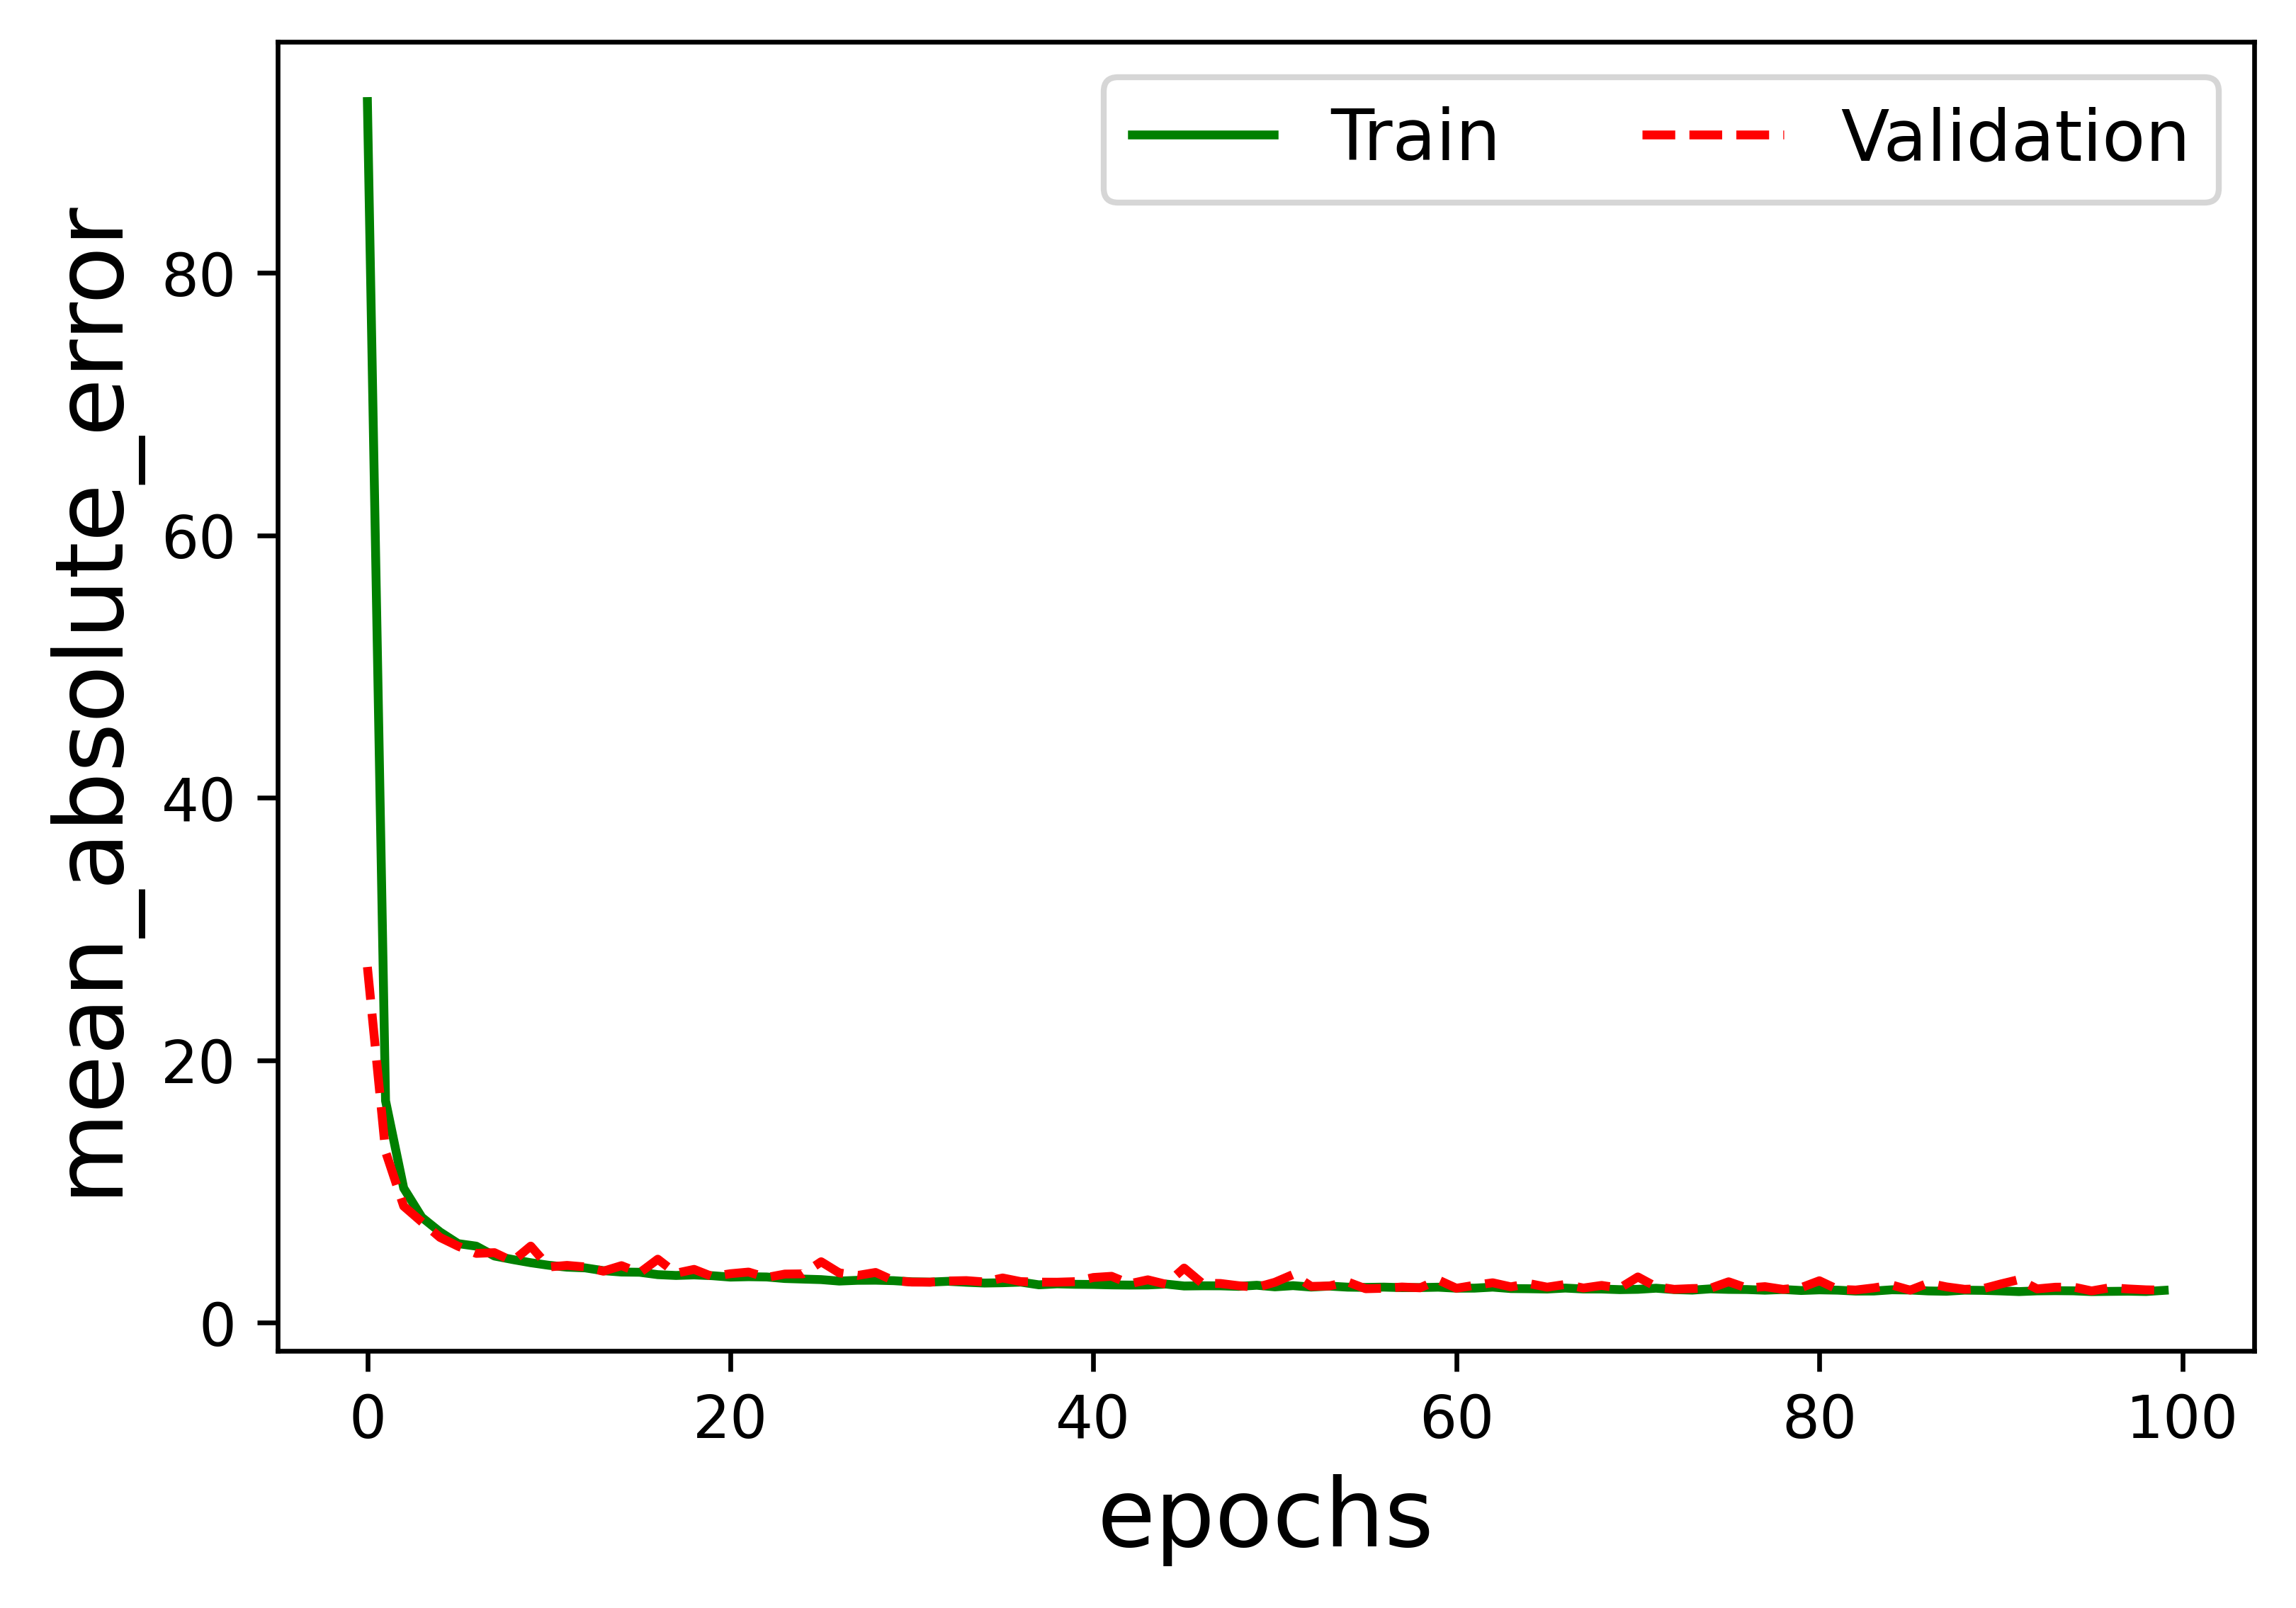

In [8]:
plt.figure(figsize=(6,4), dpi=600)
plt.plot(model.history['loss'],'g')
plt.plot(model.history['val_loss'],'--r')
#plt.title("Tuned model regression")
plt.gca().set_xlabel('epochs', fontsize=16)
plt.gca().set_ylabel('mean_absolute_error',fontsize=16)
plt.legend(['Train','Validation'], loc='upper right',fontsize=12, ncol=2)
#plt.savefig('mean_squared_error_linear.jpg')
plt.show()

In [9]:
y_pred = ann.predict(X_test)
print(y_pred)

224/224 [==============================] - 1s 2ms/step
[[355.19693]
 [321.06332]
 [351.54993]
 ...
 [339.66357]
 [383.77112]
 [330.24243]]


In [10]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [11]:
r2 = r2_score(y_test,y_pred)
print(r2)
rmse = mean_squared_error(y_test,y_pred,squared=False)
print(rmse)

0.9571623929098392
6.289310770189645


In [12]:
y_pred1 = ann.predict(X)
r22 = r2_score(y,y_pred1)
print(r22)

rmse2 = mean_squared_error(y,y_pred1,squared=False)
print(rmse2)

894/894 [==============================] - 3s 3ms/step
0.9695870888721856
5.284839291725692


In [13]:
X.shape[0]

28577

In [15]:
# ANN_pred = pd.DataFrame(y_pred)
# ANN_pred.columns = ['pCO2ANN_testp']

# ANN_pred_train = pd.DataFrame(y_pred1)
# ANN_pred_train.columns = ['pCO2ANN_trainp']

# ANN_pred.to_csv("ANNpred_test.csv",index=False)

# ANN_pred_train.to_csv("ANNpred_train.csv",index=False)

# # ANN_pred.to_csv('ANN_pred_linear_onlySSTnSSS.csv',index=False)
# ann.save("ANNmodel.h5")

!pip install shap
import shap

# print the JS visualization code to the notebook
shap.initjs()

explainer = shap.KernelExplainer(ann.predict,X_train)

shap_values = explainer.shap_values(X_test,nsamples=100)

shap_values = shap_values[0]

shap.summary_plot(shap_values[:,2:],X_test[:,2:],feature_names=['SST','SSS'])


shap_values[0]

X_test

df22 = pd.read_csv('RAMA SSTnSSSfromSAT.csv')

df22.head()

df22.boxplot()

df22 = sc.transform(df22)

y_predSat = ann.predict(df22)

ypredSat = pd.DataFrame(y_predSat,columns=['pCO2ANN'])

ypredSat.head()

#ypredSat.to_csv('pCO2ANNrama_onlySSTnSSS.csv',index=None)